In [88]:
from collections import defaultdict
from typing import List, Dict
from itertools import combinations
import math
from math import sqrt
import sys
import random

class UnionFind():
    """
    UnionFind

    Note:
        (参考) https://note.nkmk.me/python-union-find/
    """
    def __init__(self, n: int) -> None:
        """
        UnionFind

        Args:
            n (int): 頂点の数
        """
        self.n = n
        self.parents = [-1] * n
        
    def find(self, x: int) -> int:
        """
        要素xを含む集合の根を返す
        
        Args:
            x (int): 要素x
        
        Returns:
            int: 要素xを含む集合の根
        """
        if self.parents[x] < 0:
            return x
        else:
            self.parents[x] = self.find(self.parents[x])
            return self.parents[x]
    
    def union(self, x: int, y: int) -> None:
        """
        要素xが属するグループと要素yが属するグループを併合する
        
        Args:
            x (int): 要素x
            y (int): 要素y
        """
        x = self.find(x)
        y = self.find(y)
        if x == y:
            return
        if self.parents[x] > self.parents[y]:
            x, y = y, x
        self.parents[x] += self.parents[y]
        self.parents[y] = x

    def size(self, x: int) -> int:
        """
        要素xが属するグループのサイズを返す

        Args:
            x (int): 要素x

        Returns:
            int: 要素xを含む集合の要素の数
        """
        return -self.parents[self.find(x)]
    
    def same(self, x: int, y: int) -> bool:
        """
        要素xと要素yが同じグループに属するかを返す

        Args:
            x (int): 要素x
            y (int): 要素y

        Returns:
            bool: xとyが同じ集合に属するときにTrue、含まれないときにFalse
        """
        return self.find(x) == self.find(y)
    
    def members(self, x: int) -> List[int]:
        """
        要素xが属するグループに属する要素をリストで返す

        Args:
            x (int): 要素x
        
        Returns:
            List[int]: 要素xが含まれる集合の全要素のリスト
        """
        root = self.find(x)
        return [i for i in range(self.n) if self.find(i) == root]
    
    def roots(self) -> List[int]:
        """
        根のリストを返す
        
        Returns:
            List[int]: 根のリスト
        """
        return [i for i, x in enumerate(self.parents) if x < 0]
    
    def group_count(self) -> int:
        """
        グループの数を返す

        Returns:
            int: 現在の集合の数
        """
        return len(self.roots())
    
    def all_group_members(self) -> Dict[int, List[int]]:
        """
        {根:[そのグループに含まれる要素のリスト], ...}のdefaultdictを返す

        Returns:
            Dict[list] : 根:[要素集合]の形で記述された、全ての集合のリスト
        """
        group_members = defaultdict(list)
        for member in range(self.n):
            group_members[self.find(member)].append(member)
        return group_members

    def __str__(self) -> str:
        return '\n'.join(f'{r}: {m}' for r, m in self.all_group_members().items())


In [48]:
texts = []
for i in range(10):
    with open(f'./tools/in/{i:04}.txt', 'r') as f:
        text = f.readlines()
    texts.append(text)

In [65]:
def read_text(_text):
    # read input
    cursor = 0
    _N, _M, _Q, _L, _W = map(int, _text[cursor].strip().split())
    cursor += 1
    _G = list(map(int, _text[cursor].strip().split()))
    cursor += 1
    _lx, _rx, _ly, _ry = [], [], [], []
    for i in range(_N):
        a, b, c, d = map(int, _text[cursor+i].strip().split())
        _lx.append(a)
        _rx.append(b)
        _ly.append(c)
        _ry.append(d)
    cursor += _N
    _TRUE_POS = [list(map(int, _text[cursor+i].strip().split())) for i in range(_N)]

    return _N, _M, _Q, _L, _W, _G, _lx, _rx, _ly, _ry, _TRUE_POS

In [81]:
N, M, Q, L, W, G, lx, rx, ly, ry, TRUE_POS = read_text(texts[3])

<BarContainer object of 800 artists>

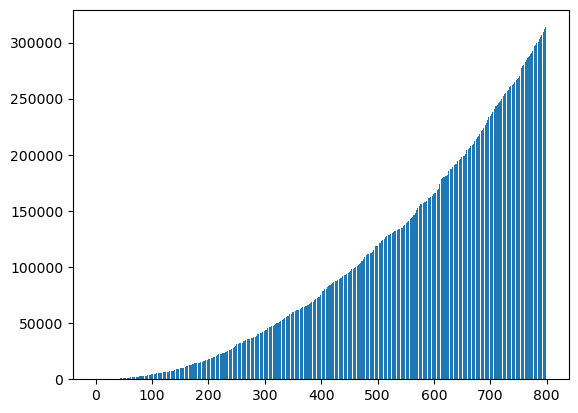

In [82]:
import matplotlib.pyplot as plt

areas = []
for i in range(N):
    areas.append((rx[i]-lx[i]) * (ry[i]-ly[i]))

areas.sort()
plt.bar(range(N), areas)

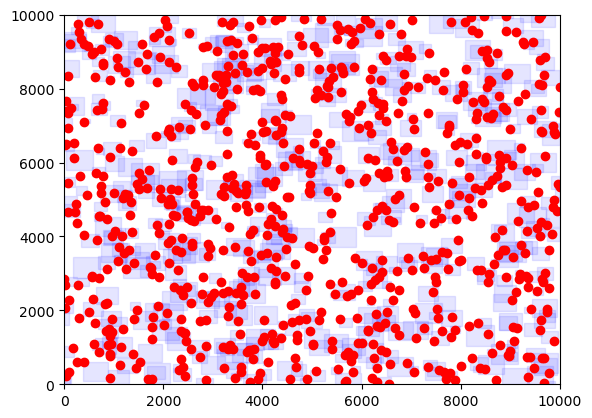

In [84]:
import matplotlib.patches as pat
from itertools import combinations
_lx, _rx, _ly, _ry = lx[:], rx[:], ly[:], ry[:]

line_points  = []
for i in range(N):
    if (rx[i]-lx[i]) * (ry[i]-ly[i]) < 100:
        line_points.append(i)

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(0, 10000)
ax.set_ylim(0, 10000)

for i in range(N):
    rec = pat.Rectangle(xy=(rx[i], ry[i]), width=lx[i] - rx[i], 
                        height=ly[i] - ry[i], angle=0, color='b', alpha=0.1)
    ax.add_patch(rec)

ax.scatter([x[0] for x in TRUE_POS], [x[1] for x in TRUE_POS], color='r')

# for i, j in combinations(line_points, 2):
#     ax.plot([TRUE_POS[i][0], TRUE_POS[j][0]], [TRUE_POS[i][1], TRUE_POS[j][1]])

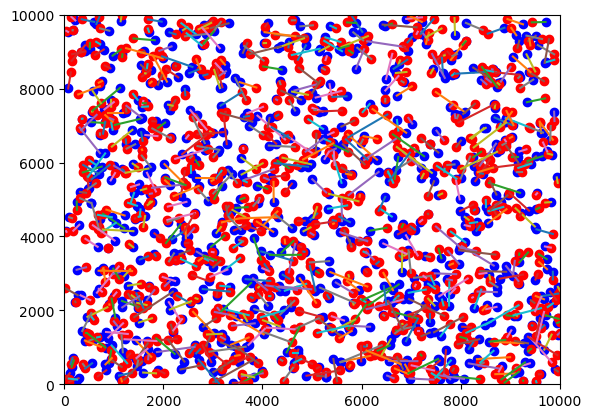

In [87]:
import matplotlib.patches as pat
from itertools import combinations

N, M, Q, L, W, G, lx, rx, ly, ry, TRUE_POS = read_text(texts[1])

_lx, _rx, _ly, _ry = lx[:], rx[:], ly[:], ry[:]
x_ = [(lx[i]+rx[i])//2 for i in range(N)]
y_ = [(ly[i]+ry[i])//2 for i in range(N)]
_x = [x[0] for x in TRUE_POS]
_y = [x[1] for x in TRUE_POS]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(0, 10000)
ax.set_ylim(0, 10000)

ax.scatter(x_, y_, color='b')
ax.scatter(_x, _y, color='r')
for i in range(N):
    ax.plot([x_[i], _x[i]], [y_[i], _y[i]])

In [90]:
from math import sqrt

def testee(l, c, TRUE_POS):
    def _dist(a, b):
        xa, ya = TRUE_POS[a-1]
        xb, yb = TRUE_POS[b-1]
        return int(sqrt((xa-xb)*(xa-xb) + (ya-yb)*(ya-yb)))

    uf = UnionFind(l)
    n2i = {n: i for i, n in enumerate(c)}
    E = sorted([(_dist(a, b), min(a, b), max(a, b)) for a, b in combinations(c, 2)])
    res = []
    for e in E:
        (_, u, v) = e
        if not uf.same(n2i[u], n2i[v]):
            res.append((u, v))
            uf.union(n2i[u], n2i[v])
    res.sort()
    return res

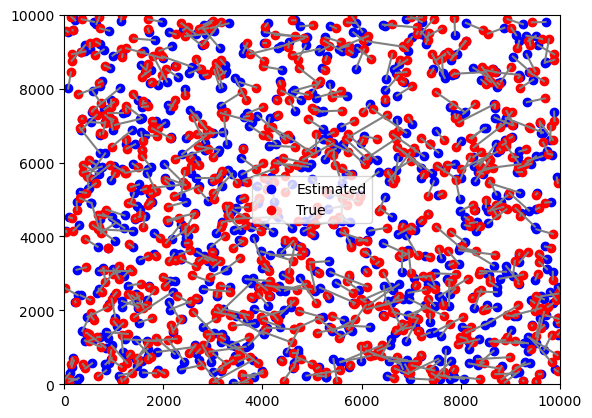

In [124]:
from collections import defaultdict
import random
import matplotlib.pyplot as plt
import math

def force_directed_layout(pos, adj_count, lx, rx, ly, ry, steps=200, C=1000):
    # pos[u] = (x, y)
    for step in range(steps):
        new_pos = [list(p) for p in pos]

        for u in range(N):
            fx, fy = 0.0, 0.0  # 力の合計
            for v in range(N):
                if adj_count[u][v] > 0:
                    # 出現頻度から擬似距離を計算
                    dist_uv = C / adj_count[u][v]
                    
                    ux, uy = pos[u]
                    vx, vy = pos[v]
                    dx, dy = vx - ux, vy - uy
                    actual_dist = math.hypot(dx, dy) + 1e-9  # 0除算防止

                    # ばねのフックの法則： (actual_dist - dist_uv) に比例して引き寄せ/押し離す
                    # kはばね定数(強さ)
                    k = 0.03
                    diff = (actual_dist - dist_uv)  # 正なら離れすぎ、負なら近すぎ
                    fx += k * diff * (dx / actual_dist)
                    fy += k * diff * (dy / actual_dist)
            
            # 力を適用
            new_pos[u][0] += fx
            new_pos[u][1] += fy

            # 長方形に収める
            nx, ny = new_pos[u]
            new_pos[u][0] = max(lx[u], min(rx[u], nx))
            new_pos[u][1] = max(ly[u], min(ry[u], ny))

        pos = [tuple(p) for p in new_pos]
    return pos


# 可視化
pos = [((lx[i]+rx[i])//2, (ly[i]+ry[i])//2) for i in range(N)]
adj_count = [[0]*N for _ in range(N)]
tmp = force_directed_layout(pos, adj_count, lx, rx, ly, ry)

x_o = [(lx[i]+rx[i])//2 for i in range(N)]
y_o = [(ly[i]+ry[i])//2 for i in range(N)]
x_t = [x[0] for x in tmp]
y_t = [x[1] for x in tmp]
_x = [x[0] for x in TRUE_POS]
_y = [x[1] for x in TRUE_POS]

fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(0, 10000)
ax.set_ylim(0, 10000)

ax.scatter(x_t, y_t, color='b', label="Estimated")
ax.scatter(_x, _y, color='r', label="True")
for i in range(N):
    ax.plot([x_[i], _x[i]], [y_[i], _y[i]], color='gray',)

ax.legend()
plt.show()


In [125]:
def calc_dist(lx, rx, ly, ry):
    return int(sqrt((lx-rx)*(lx-rx) + (ly-ry)*(ly-ry)))

def calc_mean(xs_, ys_, _xs, _ys):
    ave = 0
    for x_, y_, _x, _y in zip(xs_, ys_, _xs, _ys):
        ave += calc_dist(x_, _x, y_, _y)
    return ave/len(xs_)

mean_o = calc_mean(_x, _y, x_o, y_o)
mean_t = calc_mean(_x, _y, x_t, y_t)
mean_o, mean_t

(325.8825, 325.8825)